**제주 공공 와이파이 데이터 분석**
=========================================================
**21년 제주 관광 트렌드 분석 및 22년 관광업 수요예측**
-------------------------------------------------------------

### 1. 라이브러리

In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

# 시각화 한글 폰트
import os
plt.rc("font", family="Malgun Gothic")

### 2. 활용 데이터

**제주 동부지역 ap 접속데이터**

In [2]:
East_jeju = pd.read_csv('East_jeju.csv')
East_jeju.head(3)

,base_date,user_id,mac_address,upload,download,session_time,nationality,province,gender,age,visit_type,ap_type,ap_category,ap_place,ap_place_detail,ap_latitude,ap_longitude,ap_address_detail,pt_year,pt_month
0,20210101,25ee972873bbca5a135a33c6ba4d970dd48542ba2e79d7...,49288eca91187e2aacea777790f494ff3863d5fd61aed9...,28,0,1,미국,NaN,남성,50,거주,고정형,공영관광지,모구리야영장,모구리야영장 #1,33.406581,126.821853,서귀포시 성산읍 난산리 2960-1,2021,1
1,20210101,25ee972873bbca5a135a33c6ba4d970dd48542ba2e79d7...,49288eca91187e2aacea777790f494ff3863d5fd61aed9...,88,0,1,미국,NaN,남성,50,거주,고정형,공영관광지,모구리야영장,모구리야영장 #1,33.406581,126.821853,서귀포시 성산읍 난산리 2960-1,2021,1
2,20210101,25ee972873bbca5a135a33c6ba4d970dd48542ba2e79d7...,49288eca91187e2aacea777790f494ff3863d5fd61aed9...,328,0,2,미국,NaN,남성,50,거주,고정형,공영관광지,모구리야영장,모구리야영장 #1,33.406581,126.821853,서귀포시 성산읍 난산리 2960-1,2021,1


**고정형 ap** 

In [3]:
fixed1819 = pd.read_csv('fixed 1819.csv')
fixed20 = pd.read_csv('fixed 2020.csv')
fixed1819.head(3)

,base_date,mac_address,ap_install_place,install_location_detail,open_date,category,address_dong,address_detail,latitude,longitude,pt_year,pt_month
0,20180425,642302fd765e18121ad42a39f8d67f4ce5eecc17483506...,Yongyeon_B,-,NaN,-,- -,-,-,-,2018,4
1,20180425,def22302bc33e0a0906aefe20e52ca7ce5091d3e1be554...,SeosaraRoad_#2_NO46_B,-,NaN,-,- -,-,-,-,2018,4
2,20180425,788c15fe96dfd109c59be72bb263bfc9f4e93a8b6cbe49...,올인하우스,건물외벽 북,NaN,사설관광지,서귀포시 성산읍,서귀포시 성산읍 고성리 57,33.425779,126.931337,2018,4


**카드 매출 데이터 1 (1km 격자형, 2019-22)**

In [5]:
card = pd.read_csv('card 1922.csv')
card.head(3)

,base_year_month,city,area_type,bjd,grid_1km,biz_cd,biz_nm,user_type,age,sex,user_cnt,use_cnt,use_amt,pt_year,pt_month
0,201901,서귀포시,도심,강정동,10004320371,I56114,서양식 음식점업,내국인,30.0,남성,9,9,131000,2019,1
1,201901,서귀포시,도심,강정동,10004320471,G47214,과실 및 채소 소매업,내국인,50.0,남성,2,2,40000,2019,1
2,201901,서귀포시,도심,강정동,10004320471,G47214,과실 및 채소 소매업,내국인,70.0,여성,1,1,36000,2019,1


In [13]:
# 22년 1월 조천읍 여관업 데이터 
jo_card = card[card['bjd']=='조천읍']
jo_card[(jo_card['biz_nm']=='여관업')&(jo_card['base_year_month']==202201)] # 1박에 10만원 남짓인데 여관이네? 

,base_year_month,city,area_type,bjd,grid_1km,biz_cd,biz_nm,user_type,age,sex,user_cnt,use_cnt,use_amt,pt_year,pt_month
3299027,202201,제주시,읍면,조천읍,10004332106,I55112,여관업,내국인,20.0,남성,8,9,298600,2022,1
3300653,202201,제주시,읍면,조천읍,10004332205,I55112,여관업,내국인,40.0,여성,92,96,9902162,2022,1
3301079,202201,제주시,읍면,조천읍,10004332200,I55112,여관업,법인,NaN,알수없음,13,15,3868100,2022,1
3301941,202201,제주시,읍면,조천읍,10004331905,I55112,여관업,내국인,50.0,여성,1,1,280000,2022,1
3302469,202201,제주시,읍면,조천읍,10004332106,I55112,여관업,법인,NaN,알수없음,106,129,14717893,2022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393414,202201,제주시,읍면,조천읍,10004322696,I55112,여관업,제주도민,60.0,여성,1,2,26000,2022,1
3393676,202201,제주시,읍면,조천읍,10004332305,I55112,여관업,내국인,50.0,여성,2,2,83000,2022,1
3393739,202201,제주시,읍면,조천읍,10004332007,I55112,여관업,내국인,40.0,여성,1,1,60000,2022,1
3393850,202201,제주시,읍면,조천읍,10004332200,I55112,여관업,내국인,50.0,여성,2,3,162000,2022,1


**카드매출 데이터 2 (요일별, 2021)**

In [3]:
card_w = pd.read_csv('card21_week.csv')
card_w.head(10)

,base_year_month,area_type,biz_cd,biz_nm,user_type,tour_type,week,age,sex,user_cnt,use_cnt,use_amt,pt_year,pt_month
0,202101,제주시,I56112,중식 음식점업,내국인,개별,월요일,50.0,남성,53,54,1346100,2021,1
1,202101,제주시,I56112,중식 음식점업,내국인,개별,금요일,40.0,남성,47,50,1234200,2021,1
2,202101,제주시 서부,I56112,중식 음식점업,제주도민,도민,화요일,40.0,남성,85,88,2301300,2021,1
3,202101,제주시,I56111,한식 음식점업,제주도민,도민,월요일,50.0,여성,2636,2819,83151690,2021,1
4,202101,서귀포시,G47121,슈퍼마켓,제주도민,도민,목요일,40.0,여성,714,858,26056450,2021,1
5,202101,제주시 서부,I56111,한식 음식점업,내국인,단체,일요일,60.0,남성,52,55,2005900,2021,1
6,202101,서귀포시,G47121,슈퍼마켓,제주도민,도민,월요일,40.0,남성,737,901,29183160,2021,1
7,202101,서귀포시,G47119,기타 대형 종합 소매업,제주도민,도민,월요일,60.0,여성,231,294,14225330,2021,1
8,202101,제주시,G47122,체인화 편의점,법인,단체,금요일,NaN,알수없음,995,1167,19261020,2021,1
9,202101,제주시 동부,I56114,서양식 음식점업,내국인,개별,토요일,30.0,남성,122,127,2549000,2021,1


### 3. 결측치 확인 및 처리

#### 3.1. 제주 동부 

In [8]:
East_jeju.isna().sum()

base_date                   0
user_id                     0
mac_address                 0
upload                      0
download                    0
session_time                0
nationality                 0
province             25517125
gender                      0
age                         0
visit_type                  0
ap_type                     0
ap_category                 0
ap_place                    0
ap_place_detail             0
ap_latitude                 0
ap_longitude                0
ap_address_detail           0
pt_year                     0
pt_month                    0
dtype: int64

전체 27,325,901 행 중 25,517,125개의 결측값을 갖는 **province 열 제거**

In [9]:
East_jeju = East_jeju.drop(['province'], axis=1)

#### 3.2. 고정형 데이터

In [10]:
fixed1819.isna().sum()

base_date                     0
mac_address                   0
ap_install_place              0
install_location_detail       0
open_date                  2341
category                     32
address_dong                  0
address_detail                0
latitude                      0
longitude                     0
pt_year                       0
pt_month                      0
dtype: int64

In [11]:
fixed20.isna().sum()

base_date                   0
manage_no                   0
mac_address                 0
ap_group_name               0
install_location_detail     2
open_date                   0
category                    0
category_detail            22
address_dong                4
address_detail              0
latitude                    0
longitude                   0
pt_year                     0
pt_month                    0
dtype: int64

#### 3.3. 카드데이터 

카드 데이터는 **성별에 결측값이 존재**한다.   
주로 **법인과 외국인**의 성별에 결측값이 존재한다.   
  
최근 부상 중인 스타트업 근무 트렌드 중 일+휴가 의미의 워케이션은   
직원 만족도와 업무성과 증진을 위해 지자체와 기업이 채택하고 있어 '법인'과 관련성이 높아보인다.  

In [12]:
card.isna().sum()

base_year_month         0
city                    0
area_type               0
bjd                     0
grid_1km                0
biz_cd                  0
biz_nm                  0
user_type               0
age                215270
sex                     0
user_cnt                0
use_cnt                 0
use_amt                 0
pt_year                 0
pt_month                0
dtype: int64

**age 결측치를 999로 대체한다.** 

In [33]:
card.fillna(999, inplace=True)

In [32]:
# type = ['내국인', '법인', '제주도민', '기타외국', '중국', '일본', '동남아']

# print('<card>')
# for i in type:
#     print(f'{i} : {card[card["user_type"]==i]["age"].isna().sum()}')

# print('\n')
# print('<card_week>')
# for i in type:
#     print(f'{i} : {card_21w[card_21w["user_type"]==i]["age"].isna().sum()}')

# print('\n')
# print('<card_time>')
# for i in type:
#     print(f'{i} : {card_21t[card_21t["user_type"]==i]["age"].isna().sum()}')

### 4. 동부 지역별 데이터프레임화

In [17]:
# 조천읍
Jocheon = East_jeju[East_jeju['ap_address_detail'].str.contains('조천', na=False)]

# 구좌읍
Gujwa = East_jeju[East_jeju['ap_address_detail'].str.contains('구좌', na=False)]

# 서귀포 성산읍
Seongsan = East_jeju[East_jeju['ap_address_detail'].str.contains('성산', na=False)]

# 구제주
Gujeju = East_jeju[East_jeju['ap_address_detail'].str.contains('일도|이도|삼도|용담|건입|도두|화북|삼양|아라|봉개', na=False)]

In [18]:
# Jocheon.to_csv('Jocheon.csv', index=False)
# Gujwa.to_csv('Gujwa.csv', index=False)
# Seongsan.to_csv('Seongsan.csv', index=False)
# Gujeju.to_csv('Gujeju.csv', index=False)

In [19]:
# 카드데이터 동부 지역

Card = card[card['bjd'].str.contains('조천|구좌|성산|일도|이도|삼도|용담|건입|도두|화북|삼양|아라|봉개', na=False)] # w,t 는 '제주 동부'로 묶여있음 

In [29]:
Card.head()

,base_year_month,city,area_type,bjd,grid_1km,biz_cd,biz_nm,user_type,age,sex,user_cnt,use_cnt,use_amt,pt_year,pt_month
8501,201901,서귀포시,읍면,성산읍,10004323588,G47216,건강보조식품 소매업,내국인,30.0,남성,1,1,12000,2019,1
8502,201901,서귀포시,읍면,성산읍,10004323690,G47122,체인화 편의점,내국인,40.0,여성,7,7,43350,2019,1
8503,201901,서귀포시,읍면,성산읍,10004323690,G47122,체인화 편의점,내국인,50.0,여성,4,4,47450,2019,1
8504,201901,서귀포시,읍면,성산읍,10004323690,G47122,체인화 편의점,내국인,50.0,남성,11,12,146300,2019,1
8505,201901,서귀포시,읍면,성산읍,10004323690,G47122,체인화 편의점,법인,999.0,알수없음,14,14,117700,2019,1


### 5. 21년 숙박업

In [20]:
# 지역X숙박업 종류(area_accom)별 이용자수, 매출

# 21년 카드 데이터
Card21 = Card[Card['pt_year']==2021]

# 도시 / 읍면 나누기 
city = Card21[Card21['area_type']=='도심']
contry = Card21[Card21['area_type']=='읍면']


# 도심지 숙박업
city_condo = city[city['biz_nm']=='휴양콘도 운영업']
city_motel = city[city['biz_nm']=='여관업']
city_hotel = city[city['biz_nm']=='호텔업']

# 읍면 숙박업 
contry_condo = contry[contry['biz_nm']=='휴양콘도 운영업']
contry_motel = contry[contry['biz_nm']=='여관업']
contry_hotel = contry[contry['biz_nm']=='호텔업']

In [21]:
area_accom = pd.DataFrame({'종류' : ['city_condo', 'city_motel', 'city_hotel', 'contry_condo', 'contry_motel', 'contry_hotel'], 
                            'len' : [len(city_condo), len(city_motel), len(city_hotel), len(contry_condo), len(contry_motel), len(contry_hotel)],
                            '매출' : [city_condo['use_amt'].sum(), city_motel['use_amt'].sum(), city_hotel['use_amt'].sum(), contry_condo['use_amt'].sum(), contry_motel['use_amt'].sum(), contry_hotel['use_amt'].sum()]})

In [22]:
area_accom

,종류,len,매출
0,city_condo,0,0
1,city_motel,6767,5588272144
2,city_hotel,1548,7362206535
3,contry_condo,622,6063785835
4,contry_motel,6930,5853432729
5,contry_hotel,392,213799331


In [24]:
# 월 별 숙박시설 별 추이 시각화 함수 (숙박 종류, 수요 기준)

def area_accom_visual(accom, col): 
    empty = []
    for i in range(1,13):
        supply = accom[accom['pt_month']==i][col].sum()
        empty.append(supply)

    df = pd.DataFrame({'month' :[1,2,3,4,5,6,7,8,9,10,11,12], 'user_cnt': empty})
    return df

- 숙박업별 이용자 수 시각화

Text(0.5, 1.0, 'contry_hotel')

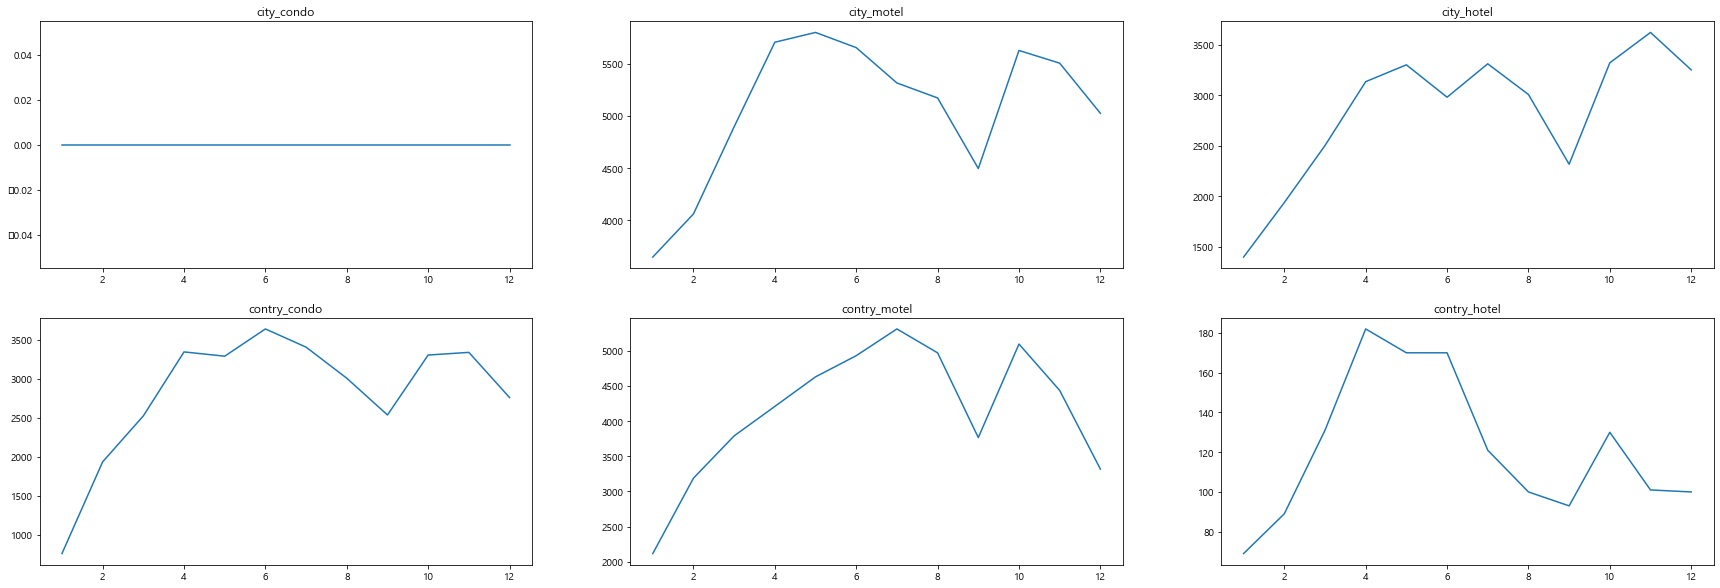

In [31]:
fig, axes = plt.subplots(2,3)
fig.set_size_inches(30,10)

x = [1,2,3,4,5,6,7,8,9,10,11,12]
y = area_accom_visual(city_condo, 'user_cnt')['user_cnt'].tolist()
y2 = area_accom_visual(city_motel, 'user_cnt')['user_cnt'].tolist()
y3 = area_accom_visual(city_hotel, 'user_cnt')['user_cnt'].tolist()
y4 = area_accom_visual(contry_condo, 'user_cnt')['user_cnt'].tolist()
y5 = area_accom_visual(contry_motel, 'user_cnt')['user_cnt'].tolist()
y6 = area_accom_visual(contry_hotel, 'user_cnt')['user_cnt'].tolist()

axes[0,0].plot(x,y)
axes[0,1].plot(x,y2)
axes[0,2].plot(x,y3)
axes[1,0].plot(x,y4)
axes[1,1].plot(x,y5)
axes[1,2].plot(x,y6)

axes[0,0].set_title('city_condo')
axes[0,1].set_title('city_motel')
axes[0,2].set_title('city_hotel')
axes[1,0].set_title('contry_condo')
axes[1,1].set_title('contry_motel')
axes[1,2].set_title('contry_hotel')

- 숙박업별 매출 추이 시각화

In [26]:
# fig, axes = plt.subplots(2,3)
# fig.set_size_inches(100,30)

# x = [1,2,3,4,5,6,7,8,9,10,11,12]
# y = area_accom_visual(city_condo, 'use_amt')['use_amt'].tolist()
# y2 = area_accom_visual(city_motel, 'use_amt')['use_amt'].tolist()
# y3 = area_accom_visual(city_hotel, 'use_amt')['use_amt'].tolist()
# y4 = area_accom_visual(contry_condo, 'use_amt')['use_amt'].tolist()
# y5 = area_accom_visual(contry_motel, 'use_amt')['use_amt'].tolist()
# y6 = area_accom_visual(contry_hotel, 'use_amt')['use_amt'].tolist()

# axes[0,0].bar(x,y)
# axes[0,1].bar(x,y2)
# axes[0,2].bar(x,y3)
# axes[1,0].bar(x,y4)
# axes[1,1].bar(x,y5)
# axes[1,2].bar(x,y6)

# axes[0,0].set_title('city_condo')
# axes[0,1].set_title('city_motel')
# axes[0,2].set_title('city_hotel')
# axes[1,0].set_title('contry_condo')
# axes[1,1].set_title('contry_motel')
# axes[1,2].set_title('contry_hotel')

In [27]:
# y 축 공유해서 추이별로 살펴보고 
# 도심형 저가, 중소형 숙박시설 - 워케이션, 휴양 목적의 고가 펜션, 호텔으로 간주할만한 거 고르기

--- 여기까지 ! 


### 고정형 데이터 일별로 그룹화

**1) 18,19년도 고정형 데이터**

In [ ]:
# fixed1819['base_date'].unique()

In [ ]:
# fixed1819 = fixed1819.groupby('base_date')
# # fixed1819.groups

**기준일자별로 **

In [ ]:
# groups = [20180425, 20180422, 20180811, 20180820, 20180813, 20190730]

# for group in groups:
#     if len(gr.get_group(group)) == len(gr.get_group(group)["mac_address"].unique()):
#         pass
#     else:
#         print(f'<{group}>')
#         print(f'설치 ap 수 : {len(gr.get_group(group))}')
#         print(f'ap 고유수 : {len(gr.get_group(group)["mac_address"].unique())}')
#         print( )

**< 2018.04.22 >**
- **ap 이동 (표선면 > 성산읍)**

In [ ]:
# list180422 = gr.get_group(20180422)['mac_address'].unique().tolist()

# for i in list0425:
#     if len(gr.get_group(20180422)[gr.get_group(20180422)['mac_address']==i]) == 1:
#         pass
#     else:
#         mac = i

# gr.get_group(20180422)[gr.get_group(20180422)['mac_address']== mac]

# # 18.04.22 ~ 18.04.24 : 성산읍 

**< 2018. 04. 25 >**
- **불과 3일만에 원위치 (성산읍 > 표선면)**

In [ ]:
# list0425 = gr.get_group(20180425)['mac_address'].unique().tolist()

# for i in list0425:
#     if len(gr.get_group(20180425)[gr.get_group(20180425)['mac_address']==i]) == 1:
#         pass
#     else:
#         mac = i

# gr.get_group(20180425)[gr.get_group(20180425)['mac_address']== mac]

# 

**< 2019. 07. 30 >**


In [ ]:
# list190730 = gr.get_group(20190730)['mac_address'].unique().tolist()
# empty = []

# for i in list0425:
#     if len(gr.get_group(20190730)[gr.get_group(20190730)['mac_address']==i]) == 1:
#         pass
#     else:
#         print(i)

# # len(empty.unique())
# # gr.get_group(20190730)[gr.get_group(20190730)['mac_address']== mac]


In [ ]:
# Move['visit_type'].unique()

- 버스이용 거주자와 관광객 수는 거의 동일함
- 거주자의 버스이용도가 더 많거나, 거주자가 

In [ ]:
# print(len(Move[Move['visit_type']=='거주']))
# print(len(Move[Move['visit_type']=='관광']))

In [ ]:
# print(len(Move[Move['visit_type']=='거주']['mac_address'].unique()))
# print(len(Move[Move['visit_type']=='관광']['mac_address'].unique()))

- fixed 2020

In [ ]:
# fixed20['base_date'].unique()

In [ ]:
# fixed20 = fixed20.groupby('base_date')
# # fixed20.groups

In [ ]:
# fixed20.get_group(20200525)

In [ ]:
# fixed1819.set_index(fixed1819['base_date'], inplace=True)
# fixed1819=fixed1819.drop(['base_date'],1)
# fixed1819

In [ ]:
# fixed20

In [ ]:
# East_jeju['ap_category'].unique()

In [ ]:
# category1 = ['공영관광지', '버스정류소', '테마거리', '광장', '전기차충전소', '사설관광지'] 
# category2 = ['숲길', '올레코스', '공원', '해변', '체육시설', '복지회관']
# category3 = ['지하상가', '요양병원', '항구', '여객터미널', '학습관', '공항'] 
# category4 = ['학습센터', '전통시장', '박물관', '장례식장', '도서관', '다중이용시설']
# category5 = ['포구', '공공기관', '관광지', '미술관', '공연장', '관공서']

In [ ]:
# live = East_jeju[East_jeju['visit_type']=='거주']
# travel = East_jeju[East_jeju['visit_type']=='관광']

# x = ['거주', '관광']
# y = [len(live[live['ap_category']=='복지회관']), len(travel[travel['ap_category']=='복지회관'])]

# plt.bar(x, y)
# plt.show()

## **2021년 제주 공공 와이파이 데이터 분석**    
## **제주 관광지 흐름 및 동부 숙박 트렌드 동부 숙박업 수요 예측**


### **1. 접속 순위**

**1) 동부 전체**

In [ ]:
# ap_category 
East_ap_category = East_jeju['ap_category'].unique().tolist()
# Jocheon_ap_category = Jocheon['ap_category'].unique().tolist()
# Gujwa_ap_category = Gujwa['ap_category'].unique().tolist()
# Seongsan_ap_category = Seongsan['ap_category'].unique().tolist()
# Gujeju_ap_category = Gujeju['ap_category'].unique().tolist()

In [ ]:
# 접속횟수 순위 (category_list, df)

def ap_ascending(a,b):
    empty = []
    for category in a:
        empty.append(len(b[b["ap_category"]==category]))

    # 오름차순 정렬 
    df = pd.DataFrame({'ap_category' : a, '접속 횟수' : empty})
    return df.sort_values('접속 횟수', ascending=False)[:5]

**구좌읍 제외 동부 모든 지역에서 접속순위 1위 : 버스 정류장.**

In [ ]:
fig, axes = plt.subplots(2,3) # 행 열 
fig.set_size_inches((30,20)) # 가로 세로

x = ap_ascending(East_ap_category, East_jeju)['ap_category']
y = ap_ascending(East_ap_category, East_jeju)['접속 횟수']
axes[0,0].bar(x,y)

x = ap_ascending(Jocheon_ap_category, Jocheon)['ap_category']
y = ap_ascending(Jocheon_ap_category, Jocheon)['접속 횟수']
axes[0,1].bar(x,y)

x = ap_ascending(Gujwa_ap_category, Gujwa)['ap_category']
y = ap_ascending(Gujwa_ap_category, Gujwa)['접속 횟수']
axes[1,0].bar(x,y)

x = ap_ascending(Seongsan_ap_category, Seongsan)['ap_category']
y = ap_ascending(Seongsan_ap_category, Seongsan)['접속 횟수']
axes[1,1].bar(x,y)

x = ap_ascending(Gujeju_ap_category, Gujeju)['ap_category']
y = ap_ascending(Gujeju_ap_category, Gujeju)['접속 횟수']
axes[1,2].bar(x,y)

axes[0,0].set_title('East_jeju')
axes[0,1].set_title('Jocheon')
axes[0,2].set_title('Gujwa')
axes[1,0].set_title('Seongsan')
axes[1,1].set_title('Gujeju')
axes[2,1].set_title('.')

plt.show()

- **관광지와 무관한 category 제외**   
(버스정류소, 전기차충전소, 요양병원, 공항, 장례식장, 공공기관, 관공서 )

In [ ]:
travel_ap = ['공영관광지', '테마거리', '광장', '사설관광지', '숲길', '올레코스',
       '공원', '해변', '체육시설', '지하상가', '항구', '여객터미널', '학습관',
       '학습센터', '전통시장', '박물관', '도서관', '다중이용시설', '관광지',
       '미술관', '공연장']

In [ ]:
# 지역별 **관광지** 접속횟수 순위 (travel_ap, df)

def travel_ascending(a,b):
    empty = []
    for category in a:
        empty.append(len(b[b["ap_category"]==category]))

    # 오름차순 정렬 
    df = pd.DataFrame({'travel_ap' : a, '접속 횟수' : empty})
    return df.sort_values('접속 횟수', ascending=False)

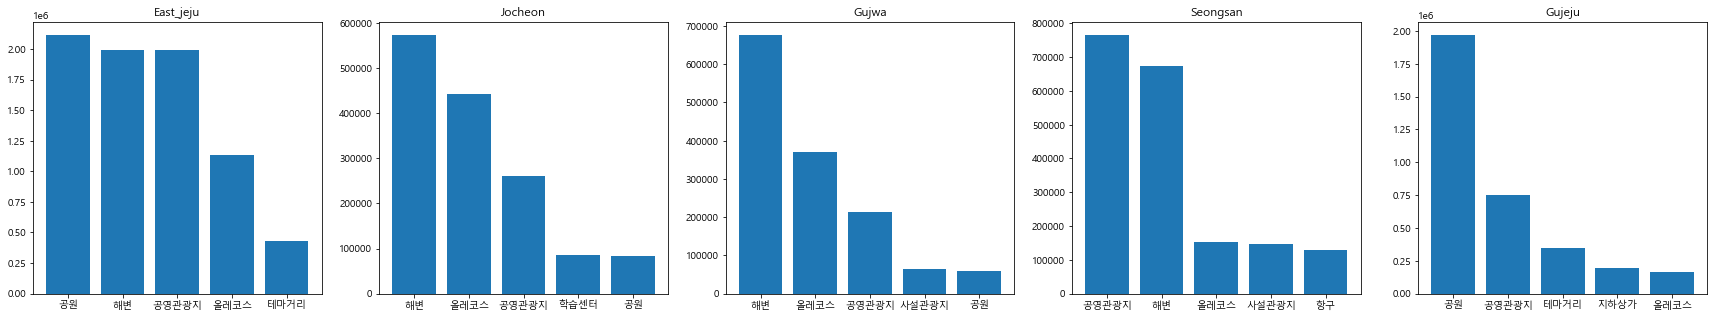

In [ ]:
fig, axes = plt.subplots(1,5) # 행 열 
fig.set_size_inches((30,5)) # 가로 세로

x = travel_ascending(travel_ap, East_jeju)[:5]['travel_ap']
y = travel_ascending(travel_ap, East_jeju)[:5]['접속 횟수']
axes[0].bar(x,y)

x = travel_ascending(travel_ap, Jocheon)[:5]['travel_ap']
y = travel_ascending(travel_ap, Jocheon)[:5]['접속 횟수']
axes[1].bar(x,y)

x = travel_ascending(travel_ap, Gujwa)[:5]['travel_ap']
y = travel_ascending(travel_ap, Gujwa)[:5]['접속 횟수']
axes[2].bar(x,y)

x = travel_ascending(travel_ap, Seongsan)[:5]['travel_ap']
y = travel_ascending(travel_ap, Seongsan)[:5]['접속 횟수']
axes[3].bar(x,y)

x = travel_ascending(travel_ap, Gujeju)[:5]['travel_ap']
y = travel_ascending(travel_ap, Gujeju)[:5]['접속 횟수']
axes[4].bar(x,y)

axes[0].set_title('East_jeju')
axes[1].set_title('Jocheon')
axes[2].set_title('Gujwa')
axes[3].set_title('Seongsan')
axes[4].set_title('Gujeju')

plt.show()

head / tail 의 가장 큰 차이점은 야외 / 실내 활동

In [ ]:
# 동부 전체 top 5
travel_ascending(travel_ap, East_jeju).head(5)

,travel_ap,접속 횟수
6,공원,2116046
7,해변,1991190
0,공영관광지,1990743
5,올레코스,1135057
1,테마거리,432488


In [ ]:
# 동부 전체 tail 5
travel_ascending(travel_ap, East_jeju).tail(5)

,travel_ap,접속 횟수
12,학습관,25734
20,공연장,13306
17,다중이용시설,3716
18,관광지,1182
19,미술관,858


In [ ]:
def highlight_max(val):
    color = 'red' if val == max else 'black'
    return 'color: %s' % color

In [ ]:
East_head = East_jeju[East_jeju['ap_category']=='공원']['ap_place'].unique().tolist()

# 제주 동부 공영관광지 접속 순위 
def East_head_ascending(a,b):
    empty = []
    for place in a:
        empty.append(len(b[b["ap_place"]==place]))

    # 오름차순 정렬 
    df = pd.DataFrame({'East_head' : a, '접속 횟수' : empty})
    return df.sort_values('접속 횟수', ascending=False)

East_head_ascending(East_head,East_jeju[East_jeju['ap_category']=='공원']).head(1)



,East_head,접속 횟수
7,신산공원,195862


**절대적인 접속자 수 "장소" 순위**
- head : 함덕 서우봉 해변 
- tail : 갓전시관 

In [ ]:
# 이거 다시 실행하세용.

In [34]:
# 관광지만 포함하는 동부 데이터 프레임 생성 

not_travel_category = ['버스정류소', '전기차충전소', '요양병원', '공항', '장례식장', '공공기관', '관공서']

# 동부
East_travel = East_jeju[~East_jeju['ap_category'].isin(not_travel_category)]
East_ap_place = East_travel['ap_place'].unique().tolist()

# 조천
Jocheon_travel = Jocheon[~Jocheon['ap_category'].isin(not_travel_category)]
Jocheon_ap_place = Jocheon_travel['ap_place'].unique().tolist()

# 구좌
Gujwa_travel = Gujwa[~Gujwa['ap_category'].isin(not_travel_category)]
Gujwa_ap_place = Gujwa_travel['ap_place'].unique().tolist()

# 성산
Seongsan_travel = Seongsan[~Seongsan['ap_category'].isin(not_travel_category)]
Seongsan_ap_place = Seongsan_travel['ap_place'].unique().tolist()

# 구제주 
Gujeju_travel = Gujeju[~Gujeju['ap_category'].isin(not_travel_category)]
Gujeju_ap_place = Gujeju_travel['ap_place'].unique().tolist()

In [35]:
# 관광 장소별 접속횟수 순위 (East_ap_place, East_travel)

def travel_ascending(a,b):
   empty = []
   for place in a:
      empty.append(len(b[b["ap_place"]==place]))
 
   df = pd.DataFrame({'East_a_place' : a, '접속 횟수' : empty})
   return df.sort_values('접속 횟수', ascending=False)

In [38]:
travel_ascending(East_ap_place, East_travel).head(20)

,East_a_place,접속 횟수
36,함덕 서우봉 해변,568313
12,성산일출봉,513851
48,절물자연휴양림,437018
15,광치기해변,427033
40,19코스,394466
47,20코스,288396
32,칠성로 쇼핑거리,246346
75,섭지코지,222040
0,모구리야영장,216619
26,김녕 성세기 해변,203369


- head(10) 칠성로 쇼핑거리 제외 야외관광지(활동, 체험, 자연 위주)

In [ ]:
travel_ascending(East_ap_place, East_travel).head(10)

,East_a_place,접속 횟수
36,함덕 서우봉 해변,568313
12,성산일출봉,513851
48,절물자연휴양림,437018
15,광치기해변,427033
40,19코스,394466
47,20코스,288396
32,칠성로 쇼핑거리,246346
75,섭지코지,222040
0,모구리야영장,216619
26,김녕 성세기 해변,203369


- tail(10) 야외(7), 실내(2~3)

In [ ]:
travel_ascending(East_ap_place, East_travel).tail(10)

,East_a_place,접속 횟수
87,베니스랜드,2114
163,문주란 자생지,2005
155,남생이못 습지생태 관찰원,1928
60,초록동산,1629
160,기적의 도서관,1602
137,제주민속박물관,1217
119,오션파크,1167
164,해변공연장,365
165,1-1호 어린이공원,110
133,갓전시관,84


In [43]:
# age별 unique_id 수 / 접속 기록 / 업로드 패킷 양 
# East_jeju['age'].unique()   # 0 ~ 60


age_list = [0,10,20,30,40,50,60]
for i in age_list:
    print(f'{i}:{len(East_jeju[East_jeju["age"]==i]["user_id"].unique())}')


0:70
10:40204
20:57542
30:32865
40:38427
50:36330
60:427


### 피쳐별 접속 특징 보기

In [ ]:
East_jeju.head(3)

,base_date,user_id,mac_address,upload,download,session_time,nationality,gender,age,visit_type,ap_type,ap_category,ap_place,ap_place_detail,ap_latitude,ap_longitude,ap_address_detail,pt_year,pt_month
0,20210101,25ee972873bbca5a135a33c6ba4d970dd48542ba2e79d7...,49288eca91187e2aacea777790f494ff3863d5fd61aed9...,28,0,1,미국,남성,50,거주,고정형,공영관광지,모구리야영장,모구리야영장 #1,33.406581,126.821853,서귀포시 성산읍 난산리 2960-1,2021,1
1,20210101,25ee972873bbca5a135a33c6ba4d970dd48542ba2e79d7...,49288eca91187e2aacea777790f494ff3863d5fd61aed9...,88,0,1,미국,남성,50,거주,고정형,공영관광지,모구리야영장,모구리야영장 #1,33.406581,126.821853,서귀포시 성산읍 난산리 2960-1,2021,1
2,20210101,25ee972873bbca5a135a33c6ba4d970dd48542ba2e79d7...,49288eca91187e2aacea777790f494ff3863d5fd61aed9...,328,0,2,미국,남성,50,거주,고정형,공영관광지,모구리야영장,모구리야영장 #1,33.406581,126.821853,서귀포시 성산읍 난산리 2960-1,2021,1


In [ ]:
# 국적, 성별(내,외국인 구분), 나이대, 방문유형, 해, 월 

내국인

In [ ]:
genders = East_jeju['gender'].unique().tolist()
ages = East_jeju['age'].unique().tolist()
visit_types = East_jeju['visit_type'].unique().tolist()
months = East_jeju['pt_month'].unique().tolist()

In [ ]:
korean = East_jeju[East_jeju['nationality']=='대한민국']

def feature_char(a,b):
    empty = []
    for i in a:
        empty.append(len(korean[korean[b]==i]))

    df = pd.DataFrame({'feature' : a, 'len' : empty})
    return df.sort_values('len', ascending=False)

In [ ]:
# Gender 
Gender = feature_char(genders, 'gender')


,feature,len
0,남성,14425631
1,여성,11777544


In [ ]:
# Age
feature_char(ages, 'age')

,feature,len
0,50,6532524
1,10,6193223
2,20,5361656
3,40,5099817
4,30,2843773
5,60,161491
6,0,10691


In [ ]:
# # Visit_type
# feature_char(visit_types, 'visit_type')

In [ ]:
# Month
feature_char(months, 'pt_month')

,feature,len
9,10,2734227
6,7,2628384
7,8,2378266
3,4,2370321
10,11,2365298
5,6,2268379
4,5,2222880
8,9,2201174
2,3,2039520
11,12,1941475


외국인

In [ ]:
foreigner = East_jeju[East_jeju['nationality']!='대한민국']
nations = foreigner['nationality'].unique().tolist()

In [ ]:
# Nationality (외국인)
# foreigner = East_jeju[East_jeju['nationality']!='대한민국']
# nations = foreigner['nationality'].unique().tolist()

for nation in nations:
    empty = []
    empty.append(len(foreigner[foreigner['nationality']==nation]))

df = pd.DataFrame({'feature' : nations, 'len' : empty})
df.sort_values('len', ascending=False).head()

ValueError: arrays must all be same length

이용자 수 예측 > 테마별 관광 코스 생성

In [ ]:
East_jeju.head(1)

,base_date,user_id,mac_address,upload,download,session_time,nationality,gender,age,visit_type,ap_type,ap_category,ap_place,ap_place_detail,ap_latitude,ap_longitude,ap_address_detail,pt_year,pt_month
0,20210101,25ee972873bbca5a135a33c6ba4d970dd48542ba2e79d7...,49288eca91187e2aacea777790f494ff3863d5fd61aed9...,28,0,1,미국,남성,50,거주,고정형,공영관광지,모구리야영장,모구리야영장 #1,33.406581,126.821853,서귀포시 성산읍 난산리 2960-1,2021,1


In [ ]:
len(East_jeju[East_jeju['ap_category']=='버스정류소']['mac_address'].unique())
# 적어도 ap 설치된 버정은 동부에 282개

282

In [ ]:
이용자 수 예측부터 해야하려나. 
# 날씨 > 일별로 묶기 
# 채준이 > 푸드트럭 입지선정 
# 유동인구 데이터 활용해서 뭐라도.. 

In [ ]:
East_jeju['ap_category'].unique()

array(['공영관광지', '버스정류소', '테마거리', '광장', '전기차충전소', '사설관광지', '숲길', '올레코스',
       '공원', '해변', '체육시설', '지하상가', '요양병원', '항구', '여객터미널', '학습관', '공항',
       '학습센터', '전통시장', '박물관', '장례식장', '도서관', '다중이용시설', '공공기관', '관광지',
       '미술관', '공연장', '관공서'], dtype=object)

In [ ]:
East_jeju[East_jeju['ap_category']=='관공서']['ap_place'].unique()

array(['공익활동지원센터'], dtype=object)

In [ ]:
East_jeju[East_jeju['ap_category']=='요양병원']['ap_place'].unique()

array(['제주의료원 부속 요양병원', '제주의료원'], dtype=object)